<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Redes  neuronales modernas para tratamiento de imagenes</center></span>

<center> Modelos pre-entrenados</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

- [Keras Applications](https://keras.io/api/applications/)
- [Deep learning Wiki](https://en.wikipedia.org/wiki/Deep_learning)
- [Deep Learning IBM](https://www.ibm.com/cloud/learn/deep-learning)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Redes Profundas Modernas](#Redes-Profundas-Modernas)
* [Clasificación con Resnet50](#Clasificación-con-Resnet50)
* [Extracción de características con VGG16](#Extracción-de-características-con-VGG16)
* [Extracción de características de una capa intermedia arbitraria con VGG19](#Extracción-de-características-de-una-capa-intermedia-arbitraria-VGG19)
* [InceptionV3](#InceptionV3)
* [MobileNetV3](#MobileNetV3)
* [Predicciones usando OpenCV](#Predicciones-usando-OpenCV)

## <span style="color:blue">Introducción</span>

En esta leccion revisamos alguna redes modernas disponibles para usar directamente para predicción, extración de caracterísitcas y ajuste fino. En la lección [Transferencia de conocimiento](tl_transfer_learning.ipynb) veremos como hacer el ajuste fino de modelos basados en estos modelos pre-entrenados. 

[[Volver]](#Contenido)

## <span style="color:blue">Redes Profundas Modernas</span>

Si desea consultar los modelos pre-entrenado disponibles en Keras vaya a [Keras applications](https://keras.io/api/applications/). Estas redes han sido desarrolladas por distintos equipos de investigación. Es común que nuevos modelos se presenten en eventos académicos especializados y que sean entrenados con conjuntos de datos para tal fin como [imagenet](https://image-net.org/), un esfuerzo de la Universidad de Standford, que contiene mas de 14 millones de imagenes, etiquetadadas en 1000 clase. En la tabla disponible en [Keras applications] aparece la exactitud en la predicción de los modelos para el conjunto de validación de imagenet. También la profundidad de la red. Por ejemplo, el  modelo `Xception`pesa 88 MB, tiene un top5 de exactitud de 0.945, 22,910,48 parámetros.


[[Volver]](#Contenido)

## <span style="color:blue">Clasificación con Resnet50</span>

Como el nombre indica, el modelo tiene 50 capas

###  Librerías

In [4]:
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.utils import plot_model

import numpy as np
import os
import matplotlib.pyplot as plt
import requests

### Carga modelo pre-entrenado

In [2]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000)

### Predicciones

In [3]:
# lista de los nombres de la imágenes
path = '../Imagenes'
imag = ['auto.png', 'Elefante.jpg', 'logo-final-ap.png', 'Mila.jpg', 'Zeus.jpg']
images = [os.path.join(path, i) for i in imag]

# arreglo para cargar las imágenes
x = np.zeros(shape = (len(images), 224, 224, 3), dtype= np.float32)

# carga y preprocesa las imágenes
for i in range(len(images)):
    img = image.load_img(images[i], target_size=(224, 224))
    w = image.img_to_array(img)
    w = np.expand_dims(w, axis=0)
    w = preprocess_input(w)
    x[i] = w

# predicciones
preds = model.predict(x)

print('Predichos:')
for i in range(len(images)):
    print(decode_predictions(preds, top=3)[i])

/home/alvaro/anaconda3/envs/tf2/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Predichos:
[('n03930630', 'pickup', 0.6370836), ('n02974003', 'car_wheel', 0.08398463), ('n03459775', 'grille', 0.046431255)]
[('n02504458', 'African_elephant', 0.8616402), ('n02504013', 'Indian_elephant', 0.10176687), ('n01871265', 'tusker', 0.036193024)]
[('n01773549', 'barn_spider', 0.28439638), ('n04275548', 'spider_web', 0.21936183), ('n06359193', 'web_site', 0.11893783)]
[('n02123597', 'Siamese_cat', 0.99984694), ('n02127052', 'lynx', 9.982576e-05), ('n02124075', 'Egyptian_cat', 2.863137e-05)]
[('n02123597', 'Siamese_cat', 0.99063057), ('n02127052', 'lynx', 0.0027637586), ('n02497673', 'Madagascar_cat', 0.0024754782)]


In [ ]:
model.summary()
plot_model(model, to_file='../Imagenes/Resnet50.png', show_shapes=True)

### Visualiza imágenes

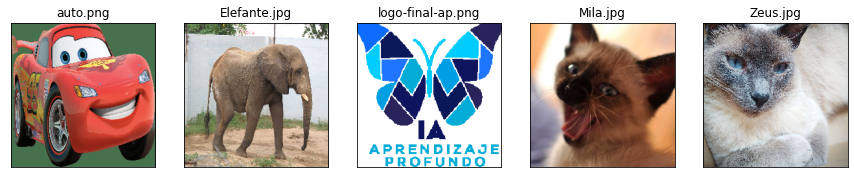

In [68]:
#plt.figure(figsize=(20,20))

fig, axs = plt.subplots(1, 5,figsize=(15,15))
for i in range(len(imag)):
    axs[i].imshow(image.load_img(images[i], target_size=(224, 224)))
    axs[i].set_title(imag[i])
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
plt.show()


[[Volver]](#Contenido)

## <span style="color:blue">Extracción de características con VGG16</span>

In [3]:
dir(tensorflow.keras.applications.vgg16)

['VGG16',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'decode_predictions',
 'preprocess_input']

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = images[0]# auto
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features.shape

/home/alvaro/anaconda3/envs/tf2/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(1, 7, 7, 512)

In [ ]:
model.summary()

In [ ]:
model.summary()
plot_model(model, to_file='../Imagenes/VGG16.png', show_shapes=True)

[[Volver]](#Contenido)

## <span style="color:blue">Extracción de características de una capa intermedia arbitraria con VGG19</span>

In [45]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = images[1]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
block4_pool_features.shape

(1, 14, 14, 512)

[[Volver]](#Contenido)

## <span style="color:blue">InceptionV3</span>

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input,
from tensorflow.keras.applications.inception_v3 import decode_predictions

In [12]:
IV3 = InceptionV3()
print('Numero de capas InceptionV3: ',len(IV3.layers))

Numero de capas InceptionV3:  313


In [ ]:
IV3.summary()

In [ ]:
plot_model(IV3, to_file='../Imagenes/IV3.png', show_shapes=True)

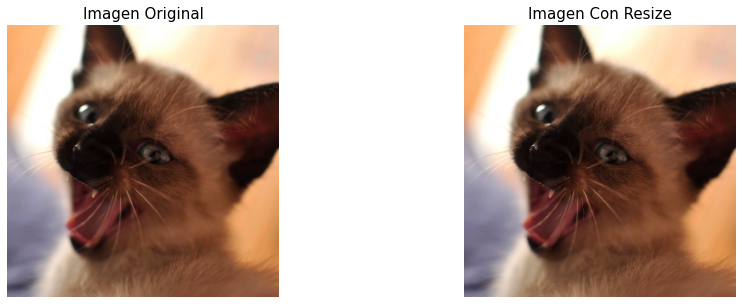

Número de clase de la imagen predicha 284 



[[('n02123597', 'Siamese_cat', 0.83834875),
  ('n02123394', 'Persian_cat', 0.023453439),
  ('n03325584', 'feather_boa', 0.0069200913),
  ('n03908714', 'pencil_sharpener', 0.0010726391),
  ('n04553703', 'washbasin', 0.0010579348)]]

In [76]:
# Ruta de la Imagen
img_path = '../Imagenes/Mila.jpg'

# Cargar Imagen
img = image.load_img(img_path)

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)


# Cargar Imagen con resize (Para la Red)
img = image.load_img(img_path,target_size=(299,299))

# Visualizar Imagen
plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Convertir a tensor
x = image.img_to_array(img)
# Expandir dimensión para forma de la red
x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = IV3.predict(x)
# Número de clase
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
# Qué objeto es
que_es=decode_predictions(features)
que_es

[[Volver]](#Contenido)

## <span style="color:blue">MobileNetV3</span>

Para entender a profundidad esta red, recomendamos el artículo

[Everything you need to know about MobileNetV3](https://towardsdatascience.com/everything-you-need-to-know-about-mobilenetv3-and-its-comparison-with-previous-versions-a5d5e5a6eeaa)

In [14]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions

mnet_v3 = MobileNetV3Large(weights='imagenet', include_top=True,input_shape=(224,224,3))
print('Número de capas MobileNetV3: ', len(mnet_v3.layers))

Número de capas MobileNetV3:  282


In [ ]:
mnet_v3.summary()
plot_model(mnet_v3, to_file='../Imagenes/MobileNetV3L.png', show_shapes=True)

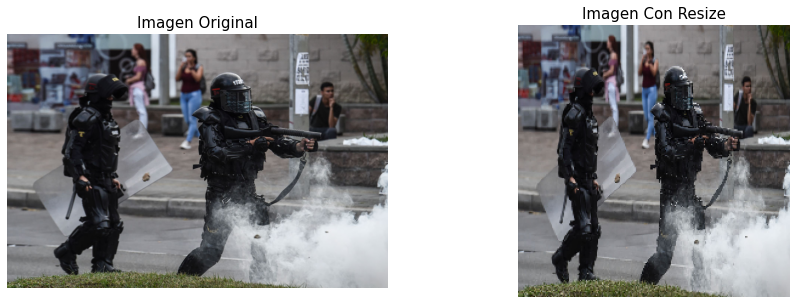

Número de clase de la imagen predicha 413 

Tipo de Dato de Salida: <class 'tensorflow.python.framework.ops.EagerTensor'>


[[('n02749479', 'assault_rifle', 0.20791145),
  ('n03000684', 'chain_saw', 0.12287154),
  ('n03763968', 'military_uniform', 0.10241595),
  ('n04090263', 'rifle', 0.053083487),
  ('n02999410', 'chain', 0.049632374)]]

In [83]:
# https://media.cnnchile.com/sites/2/2021/05/COLOMBIA.jpg
# https://ggia.berkeley.edu/assets/general/GGIA-HumanFace.jpg
# https://cnnespanol.cnn.com/wp-content/uploads/2021/05/GettyImages-1203559048.jpg?quality=100&strip=info&w=1024

url = "https://cnnespanol.cnn.com/wp-content/uploads/2021/05/GettyImages-1203559048.jpg?quality=100&strip=info&w=1024"

r = requests.get(url)
with open("../Imagenes/Patria.jpg", "wb") as f:
    f.write(r.content)

# Ruta de la Imagen
img_path = '../Imagenes/Patria.jpg'

# Cargar Imagen
img = image.load_img(img_path)

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)


# Cargar Imagen con resize (Para la Red)
img = image.load_img(img_path,target_size=(224,224))

# Visualizar Imagen
plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Convertir a tensor
x = image.img_to_array(img)
# Expandir dimensión para forma de la red
x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = mnet_v3(x)
# Número de clase
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
# Tipo de datos de salida
print("Tipo de Dato de Salida:",type(features))
# Qué objeto es (note la diferencia con los otrso modelos)
que_es=decode_predictions(np.array(features))
que_es

[[Volver]](#Contenido)

## <span style="color:blue">Predicciones usando OpenCV</span>

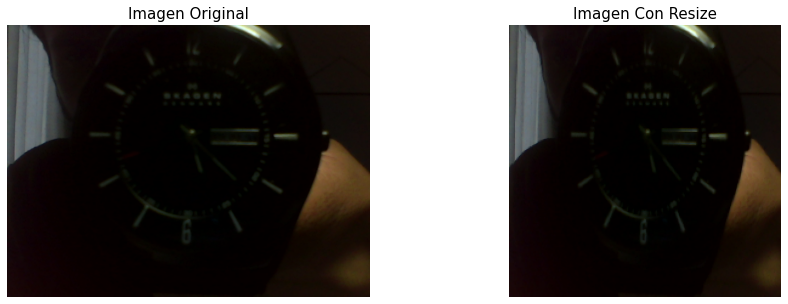

Número de clase de la imagen predicha 409 



[[('n02708093', 'analog_clock', 0.504188),
  ('n04548280', 'wall_clock', 0.07951482),
  ('n04328186', 'stopwatch', 0.035256468),
  ('n03271574', 'electric_fan', 0.025020696),
  ('n03706229', 'magnetic_compass', 0.019196104)]]

In [45]:
import cv2

video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("No se pudo abrir el dispositivo de video")
# Read picture. ret === True on success
ret, frame = video_capture.read()
# Close device
video_capture.release()

frameRGB = frame[:,:,::-1] # BGR => RGB
x = cv2.resize(frameRGB,(224,224))

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(frameRGB)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)

# Visualizar Imagen
plt.subplot(122)
plt.imshow(x)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Reescalar la imagen

x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = mnet_v3(x)
# Número de clase
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
# Qué objeto es (note la diferencia con los otrso modelos)
que_es=decode_predictions(np.array(features))
que_es

Todo esto funciona súper bien, pero...

¿Y si quisiéramos hacer una aplicación que se especialice en nuestros propios datos?

¿Qué tal modificar algunas capas de la red y con base en ella entrenar sólo algunos parámetros?

En el siguiente Notebook, se podrán responder estas y más preguntas, bienvenidos a **Transfer Learning**.

[[Volver]](#Contenido)